In [52]:
import random
import matplotlib.pyplot as plt 
import numpy as np 
import math
from functools import reduce, partial
from collections import Counter

P(E): Probabiliy of the event E
Independent Events: P(E,F) = P(E).P(F)
Dependent Events: 
Conditional Probability

In [5]:
def random_kid():
    return random.choice(["boy", "girl"])

In [7]:
random.seed(0)
both_girls = 0
older_girl = 0
either_girl = 0

In [13]:
for _ in range(1000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls +=1
    if older == "girl" or younger == "girl":
        either_girl +=1

In [14]:
both_girls

754

In [18]:
print("P(both | older):", both_girls/older_girl)
print("P(both | either):", both_girls/either_girl)

P(both | older): 0.5136239782016349
P(both | either): 0.334664891256103


### Bayes's Theorem

### Random Variables

### Continuous Distribution

In [21]:
def uniform_probibility_density_function(x):
    return 1 if x >= 0 and x < 1 else 0

In [22]:
def uniform_cumulative_density_function(x):
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

### Normal Distribution

* mean where the bell is centered
* standard deviation is how 'wide' it is

* when mean = 0 and standard deviation = 1, it is called standard normal distribution

In [29]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x-mu)**2)/2/sigma**2)/(sqrt_two_pi*sigma)

In [32]:
xs = [x/10.0 for x in range(-50,50)]

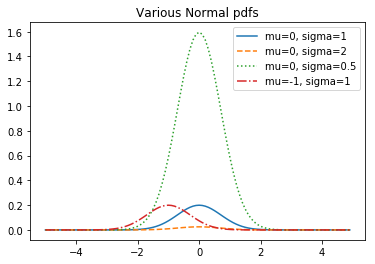

In [39]:
plt.plot(xs,[normal_pdf(x,mu=0,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs,[normal_pdf(x,mu=0,sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs,[normal_pdf(x,mu=0,sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1,sigma=1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()


In [40]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x-mu)/math.sqrt(2)/sigma))/2

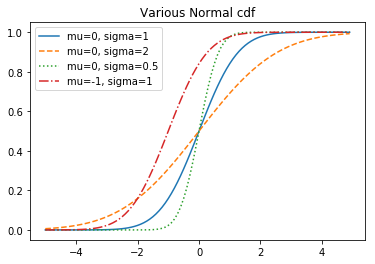

In [41]:
plt.plot(xs,[normal_cdf(x,mu=0,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs,[normal_cdf(x,mu=0,sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs,[normal_cdf(x,mu=0,sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1,sigma=1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal cdf")
plt.show()

In [42]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z = -10.0
    hi_z = 10.0
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        
        if mid_p < p:
            low_z = mid_z
        elif mid_p > p:
            hi_z = mid_z
        else:
            break
    return mid_z

### Central Limit Theorem

In [44]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

In [49]:
bernoulli_trial(9)

1

In [46]:
def binomial(n,p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [48]:
binomial(4,10)

4

In [50]:
def make_hist(p, n, num_points):
    data = [binomial(n,p) for _ in range(num_points)]
    
    histogram = Counter(data)
    
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v/num_points for v in histogram.values()],
           0.8,
           color = "0.75")
    
    mu = p * n
    sigma = math.sqrt(n*p*(1-p))
    
    xs = range(min(data), max(data)+1)
    
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs Normal Distribution")
    
    plt.show()

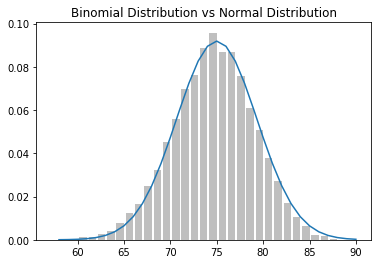

In [53]:
make_hist(0.75, 100, 10000)